In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

2023-03-19 21:31:02.456804: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Define the sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the derivative of the sigmoid activation function
def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Define the softmax activation function
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=0)

# Define the cross-entropy loss function
def cross_entropy_loss(y, y_hat):
    return -np.sum(y * np.log(y_hat))

# Define the derivative of the cross-entropy loss function
def cross_entropy_loss_prime(y, y_hat):
    return y_hat - y

def compute_accuracy(y_true, y_pred):
    y_true = np.argmax(y_true, axis=0)
    y_pred = np.argmax(y_pred, axis=0)
    accuracy = np.mean(y_true == y_pred)
    return accuracy

# Define the forward propagation function
def forward_propagation(x, w1, w2, w3):
    z1 = np.dot(w1, x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1)
    a2 = sigmoid(z2)
    z3 = np.dot(w3, a2)
    a3 = softmax(z3)
    return z1, a1, z2, a2, z3, a3

In [4]:
# Define the backpropagation function
def backprop(x, y, w1, w2, w3, learning_rate):
    # Forward pass
    z1, a1, z2, a2, z3, a3 = forward_propagation(x, w1, w2, w3)
    
    # Compute the gradients of the loss with respect to the output
    dL_da3 = (a3 - y) / y.shape[1]
    
    # Backward pass
    dz3 = dL_da3
    dw3 = np.dot(dz3, a2.T)
    da2 = np.dot(w3.T, dz3)
    dz2 = da2 * sigmoid_prime(z2)
    dw2 = np.dot(dz2, a1.T)
    da1 = np.dot(w2.T, dz2)
    dz1 = da1 * sigmoid_prime(z1)
    dw1 = np.dot(dz1, x.T)
    
    # Update the weights and biases
    w1 -= learning_rate * dw1
    w2 -= learning_rate * dw2
    w3 -= learning_rate * dw3
    
    # Compute the loss and accuracy
    loss = cross_entropy_loss(y, a3)
    accuracy = compute_accuracy(y, a3)
    
    return w1, w2, w3, loss, accuracy

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the input data
x_train = x_train.reshape((x_train.shape[0], -1)).T / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)).T / 255.0

# Convert the target output to one-hot encoding
y_train_onehot = np.eye(10)[y_train].T
y_test_onehot = np.eye(10)[y_test].T

# Define the neural network architecture
n_input = 784
n_hidden1 = 300
n_hidden2 = 200
n_output = 10

# Initialize the weights by sampling from normal distribution
w1 = np.random.randn(n_hidden1, n_input) * np.sqrt(2/n_input)
w2 = np.random.randn(n_hidden2, n_hidden1) * np.sqrt(2/n_hidden1)
w3 = np.random.randn(n_output, n_hidden2) * np.sqrt(2/n_hidden2)

# Set the hyperparameters
learning_rate = 0.1
num_epochs = 50
batch_size = 128

train_loss = []
# Train the neural network using mini-batch gradient descent
for epoch in range(num_epochs):
    # Shuffle the training data
    indices = np.random.permutation(x_train.shape[1])
    x_train = x_train[:, indices]
    y_train_onehot = y_train_onehot[:, indices]

    # Split the training data into mini-batches
    for i in range(0, x_train.shape[1], batch_size):
        # Select a mini-batch of input data and corresponding target output
        x_batch = x_train[:, i:i+batch_size]
        y_batch = y_train_onehot[:, i:i+batch_size]
        
        # Perform forward pass and backpropagation to update the weights and biases
        w1, w2, w3, loss, accuracy = backprop(x_batch, y_batch, w1, w2, w3, learning_rate)
        
        # Print the loss and accuracy every 10 mini-batches
        if i % (10 * batch_size) == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Batch {i//batch_size+1}/{x_train.shape[1]//batch_size}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    train_loss.append(loss)

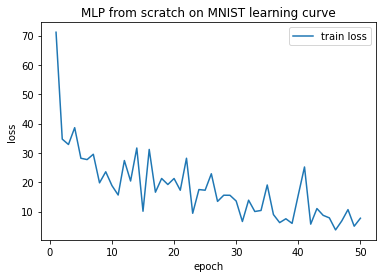

In [6]:
epochs = np.arange(1,num_epochs+1)
plt.plot(epochs, train_loss, label='train loss')
plt.legend()
plt.title('MLP from scratch on MNIST learning curve')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig('mlp_scratch.pdf')
plt.show()

In [8]:
# see how model performs on test data
z1, a1, z2, a2, z3, a3 = forward_propagation(x_test, w1, w2, w3)
accuracy = compute_accuracy(y_test_onehot, a3)
error = 1 - accuracy
error, accuracy

(0.033299999999999996, 0.9667)